Objective

Fraud detection in online payments is a multifaceted approach aimed at protecting users, businesses, and the integrity of digital financial systems.The objective of the project is to analyze the data to identify patterns and build a predictive model for fraud detection based on the given features.

Data

The data used in this project is from kaggle website


1. step: Represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: The amount of the transaction
4. nameOrig: Customer initiating the transaction
5. oldbalanceOrg: balance before the transaction of the customer initiating the transaction
6. newbalanceOrig: balance after the transaction of the customer initiating the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: It is used to define whether a transaction is fraud or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data=pd.read_csv(r'C:\Users\LENOVO\Desktop\Fraud-Detection\data\01_raw\raw.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
data.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

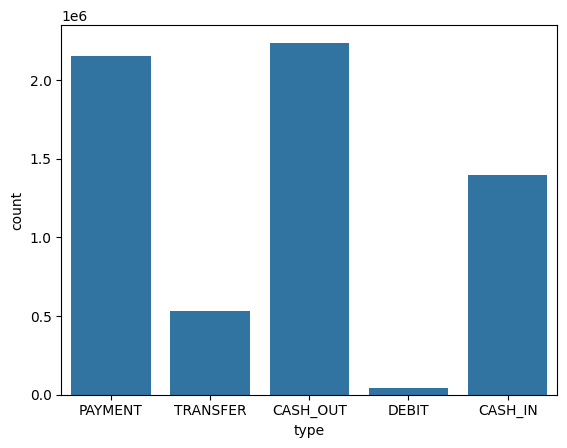

In [8]:
sns.countplot(x ='type', data = data) 
plt.show() 

From the countplot the cash_out is the majority of all types

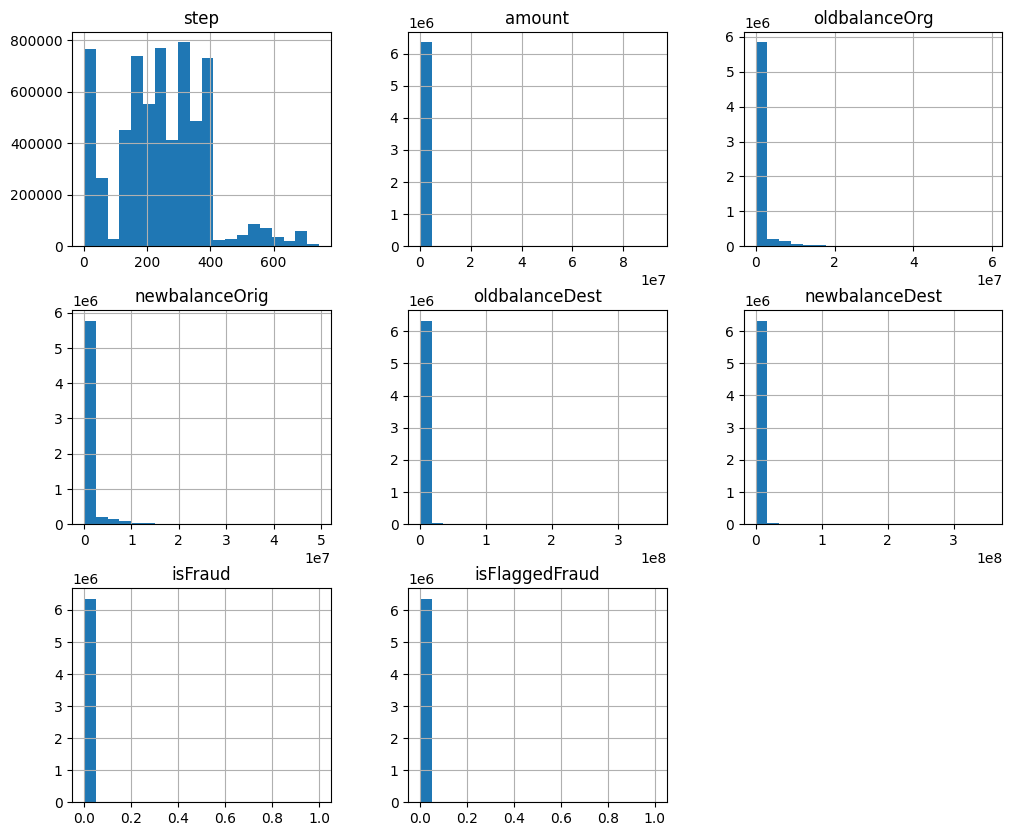

In [9]:
# Distribution of numerical features
#df=data.drop('isFraud',axis=1)
data.hist(bins=20, figsize=(12, 10))
#plt.suptitle('Histograms of Numerical Features')
plt.show()

In [10]:
data.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

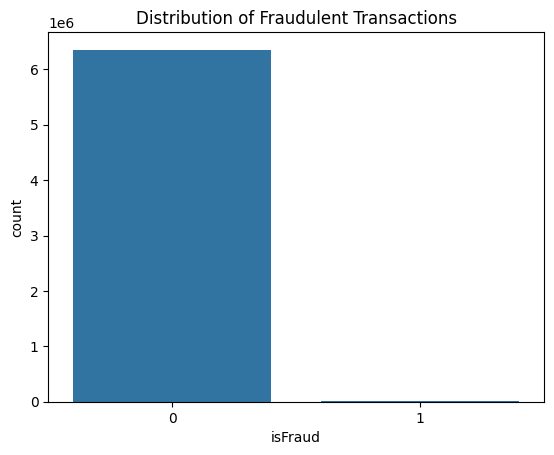

In [11]:
#Distribution of target variable
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

The target variable is highly imbalanced

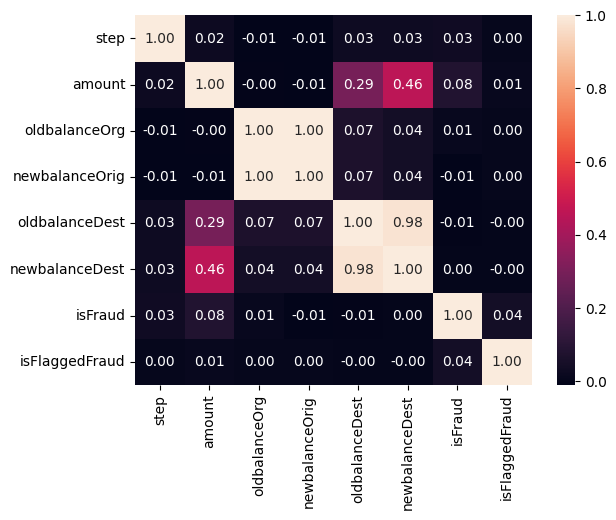

In [12]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate correlation coefficients
g=sns.heatmap(data[numerical_features].corr(),annot=True ,fmt=".2f")

oldbalanceOrg and newbalanceOrig,oldbalanceDest and newbalanceDest are highly correlated pairs

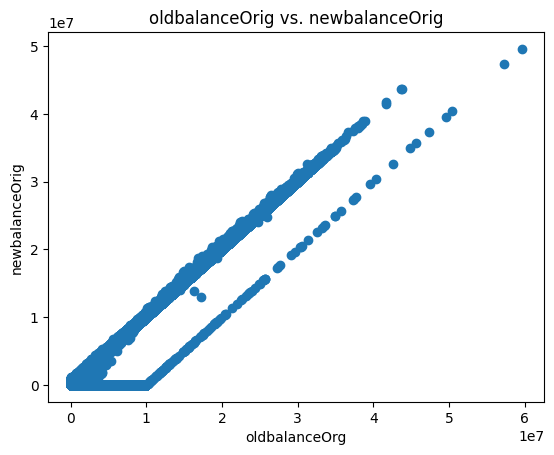

In [13]:
plt.scatter(data["oldbalanceOrg"], data["newbalanceOrig"])
plt.title("oldbalanceOrig vs. newbalanceOrig")
plt.xlabel("oldbalanceOrg")
plt.ylabel("newbalanceOrig")
plt.show()

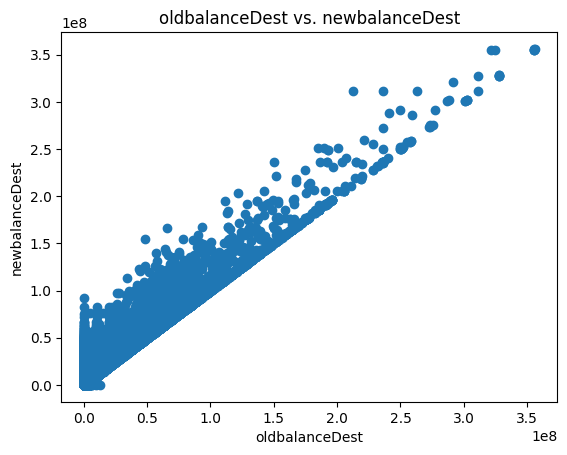

In [14]:
plt.scatter(data["oldbalanceDest"], data["newbalanceDest"])
plt.title("oldbalanceDest vs. newbalanceDest")
plt.xlabel("oldbalanceDest")
plt.ylabel("newbalanceDest")
plt.show()

In [15]:
print('The Types of fraudulent transactions are {}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates().values)))

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [16]:
#Figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]


#printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


In [17]:

#Finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


In [18]:
#Finding out the transactions which are flagged to be fraud

print("The Type of Transaction in which isFlagged is set :", data.loc[data.isFlaggedFraud == 1].type.drop_duplicates().values)


The Type of Transaction in which isFlagged is set : ['TRANSFER']


In [19]:
#To check missing values
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


Summary

Correlations:

The old balance and new balance of person before and after initiating the transaction,old balance and new balance before and after transaction of destination are highly correlated pairs

Type:

The fraudlent transactions are of type transfer and cash_out

Flagged Fraud Transactions:

The transactions that are flagged fraud are of type transfer